In [2]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import celltypist
from celltypist import models
import pandas as pd
import numpy as np
import leidenalg

In [3]:
adata = sc.read_h5ad('dataset.h5ad')

# Total cells (observations)
total_cells = adata.n_obs

# Total genes (variables)
total_genes = adata.n_vars

# Total values in the data matrix (cells × genes)
total_values = adata.n_obs * adata.n_vars

print("Total cells:", total_cells)
print("Total genes:", total_genes)
print("Total values in matrix:", total_values)


Total cells: 26129
Total genes: 36412
Total values in matrix: 951409148


In [4]:
print(adata.var)


                 feature_is_filtered feature_name feature_reference  \
ENSG00000000003                False       TSPAN6    NCBITaxon:9606   
ENSG00000000005                False         TNMD    NCBITaxon:9606   
ENSG00000000419                False         DPM1    NCBITaxon:9606   
ENSG00000000457                False        SCYL3    NCBITaxon:9606   
ENSG00000000460                False     C1orf112    NCBITaxon:9606   
...                              ...          ...               ...   
ENSG00000288701                False       PRRC2B    NCBITaxon:9606   
ENSG00000288702                False       UGT1A3    NCBITaxon:9606   
ENSG00000288705                False       UGT1A5    NCBITaxon:9606   
ENSG00000288709                False         F8A2    NCBITaxon:9606   
ENSG00000288722                False         F8A1    NCBITaxon:9606   

                feature_biotype feature_length    feature_type  
ENSG00000000003            gene           2396  protein_coding  
ENSG00000000005  

In [5]:
mt_gene_table = pd.read_csv("mt_genes_table.txt", sep="\t")

In [6]:
mt_gene_table

ensembl gene_symbol
0   ENSG00000198888      MT-ND1
1   ENSG00000198763      MT-ND2
2   ENSG00000198804      MT-CO1
3   ENSG00000198712      MT-CO2
4   ENSG00000228253     MT-ATP8
5   ENSG00000198899     MT-ATP6
6   ENSG00000198938      MT-CO3
7   ENSG00000198840      MT-ND3
8   ENSG00000212907     MT-ND4L
9   ENSG00000198886      MT-ND4
10  ENSG00000198786      MT-ND5
11  ENSG00000198695      MT-ND6
12  ENSG00000198727      MT-CYB

In [7]:
adata.var["mt"] = adata.var_names.isin(mt_gene_table["ensembl"])

In [8]:
adata.var["mt"].value_counts()

mt
False    36399
True        13
Name: count, dtype: int64

In [9]:
# Calculate percent mitochondrial genes per cell
mt_counts = adata[:, adata.var['mt']].X
if hasattr(mt_counts, "toarray"):
    mt_counts = mt_counts.toarray()

total_counts = adata.X
if hasattr(total_counts, "toarray"):
    total_counts = total_counts.toarray()

adata.obs['percent_mt'] = np.sum(mt_counts, axis=1) / np.sum(total_counts, axis=1) * 100

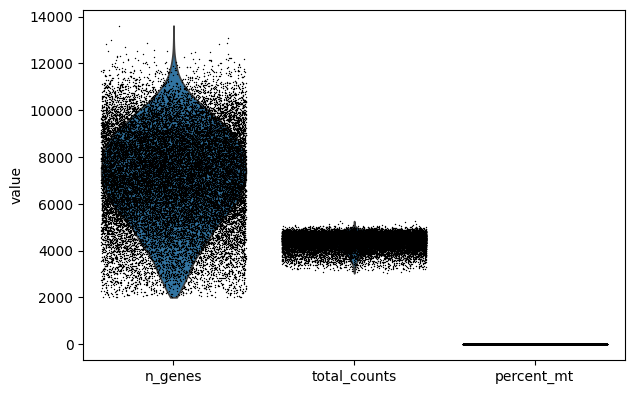

In [10]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

# Rename for convenience, or change keys in the violin call
adata.obs['n_genes'] = adata.obs['n_genes_by_counts']
adata.obs['total_counts'] = adata.obs['total_counts']

# Now plot
sc.pl.violin(adata, keys=['n_genes', 'total_counts', 'percent_mt'], jitter=0.4)


In [11]:
adata.var["mt"] = adata.var_names.isin(mt_gene_table["ensembl"])

axes: [<Axes: > <Axes: >]


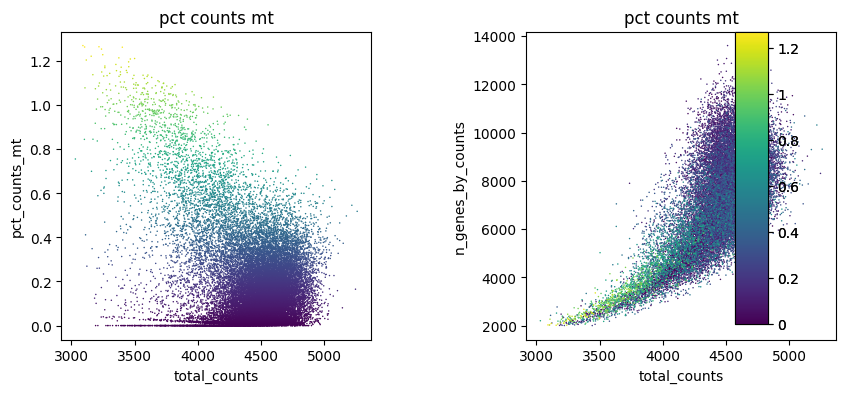

In [12]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True, log1p=True
)

ncols = 2
nrows = 1
figsize = 4
wspace = 0.5
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * figsize + figsize * wspace * (ncols -1),
             nrows * figsize),
)

plt.subplots_adjust(wspace=wspace)
print("axes:", axs)

sc.pl.scatter(adata, "total_counts", "pct_counts_mt", color="pct_counts_mt", ax=axs[0], show=False)
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt", ax=axs[1])

In [13]:
print(adata.obs.columns)

Index(['assay_ontology_term_id', 'cell_type_ontology_term_id',
       'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'sex_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data',
       'Neurotypical reference', 'Class', 'Subclass', 'Supertype',
       'Age at death', 'Years of education', 'Cognitive status', 'ADNC',
       'Braak stage', 'Thal phase', 'CERAD score', 'APOE4 status',
       'Lewy body disease pathology', 'LATE-NC stage',
       'Microinfarct pathology', 'Specimen ID', 'donor_id', 'PMI',
       'Number of UMIs', 'Genes detected', 'Fraction mitochrondrial UMIs',
       'suspension_type', 'development_stage_ontology_term_id',
       'Continuous Pseudo-progression Score', 'tissue_type', 'cell_type',
       'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid', 'percent_mt',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct

In [14]:
sc.pp.scrublet(adata)

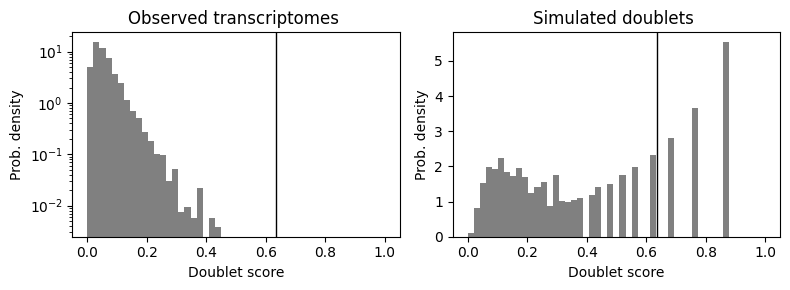

In [15]:
sc.pl.scrublet_score_distribution(adata)

In [16]:
adata.obs

assay_ontology_term_id  \
exp_component_name                                                      
AGATCGTGTCAGCGTC-L8TX_210715_01_A05-1153814277            EFO:0009922   
GGGTAGATCACTGAAC-L8TX_210429_01_E03-1142430418            EFO:0009922   
AATGAAGTCGTTCAGA-L8TX_210319_01_C07-1153814168            EFO:0009922   
GGGACAACATCGCTGG-L8TX_191029_01_A07-1156636564            EFO:0009922   
GCCAGTGAGTCGCCCA-L8TX_210521_01_C05-1142430441            EFO:0009922   
...                                                               ...   
ATTCAGGGTATGCTTG-L8TX_191126_02_G02-1156636566            EFO:0009922   
GCTGCAGGTTCGATTG-L8TX_210430_01_E05-1142430422            EFO:0009922   
TCGCAGGTCAGGACAG-L8TX_210311_01_D03-1153814157            EFO:0009922   
CTCAGGGCATGACTTG-L8TX_210318_01_B05-1153814162            EFO:0009922   
TTGCCTGAGTAACGAT-L8TX_191003_01_E03-1156636560            EFO:0009922   

                                               cell_type_ontology_term_id  \
exp_component_name                                                          
AGATCGTGTCAGCGTC-L8TX_210715_01_A05-1153814277                 CL:4023040   
GGGTAGATCACTGAAC-L8TX_210429_01_E03-1142430418                 CL:4023040   
AATGAAGTCGTTCAGA-L8TX_210319_01_C07-1153814168                 CL:4023040   
GGGACAACATCGCTGG-L8TX_191029_01_A07-1156636564                 CL:4023040   
GCCAGTGAGTCGCCCA-L8TX_210521_01_C05-1142430441                 CL:4023040   
...                                                                   ...   
ATTCAGGGTATGCTTG-L8TX_191126_02_G02-1156636566                 CL:4023040   
GCTGCAGGTTCGATTG-L8TX_210430_01_E05-1142430422                 CL:4023040   
TCGCAGGTCAGGACAG-L8TX_210311_01_D03-1153814157                 CL:4023040   
CTCAGGGCATGACTTG-L8TX_210318_01_B05-1153814162                 CL:4023040   
TTGCCTGAGTAACGAT-L8TX_191003_01_E03-1156636560                 CL:4023040   

                                               disease_ontology_term_id  \
exp_component_name                                                        
AGATCGTGTCAGCGTC-L8TX_210715_01_A05-1153814277            MONDO:0001627   
GGGTAGATCACTGAAC-L8TX_210429_01_E03-1142430418             PATO:0000461   
AATGAAGTCGTTCAGA-L8TX_210319_01_C07-1153814168             PATO:0000461   
GGGACAACATCGCTGG-L8TX_191029_01_A07-1156636564             PATO:0000461   
GCCAGTGAGTCGCCCA-L8TX_210521_01_C05-1142430441             PATO:0000461   
...                                                                 ...   
ATTCAGGGTATGCTTG-L8TX_191126_02_G02-1156636566             PATO:0000461   
GCTGCAGGTTCGATTG-L8TX_210430_01_E05-1142430422             PATO:0000461   
TCGCAGGTCAGGACAG-L8TX_210311_01_D03-1153814157            MONDO:0001627   
CTCAGGGCATGACTTG-L8TX_210318_01_B05-1153814162             PATO:0000461   
TTGCCTGAGTAACGAT-L8TX_191003_01_E03-1156636560             PATO:0000461   

                                               self_reported_ethnicity_ontology_term_id  \
exp_component_name                                                                        
AGATCGTGTCAGCGTC-L8TX_210715_01_A05-1153814277                           HANCESTRO:0005   
GGGTAGATCACTGAAC-L8TX_210429_01_E03-1142430418                           HANCESTRO:0005   
AATGAAGTCGTTCAGA-L8TX_210319_01_C07-1153814168                           HANCESTRO:0005   
GGGACAACATCGCTGG-L8TX_191029_01_A07-1156636564                           HANCESTRO:0005   
GCCAGTGAGTCGCCCA-L8TX_210521_01_C05-1142430441                           HANCESTRO:0005   
...                                                                                 ...   
ATTCAGGGTATGCTTG-L8TX_191126_02_G02-1156636566                           HANCESTRO:0005   
GCTGCAGGTTCGATTG-L8TX_210430_01_E05-1142430422                           HANCESTRO:0005   
TCGCAGGTCAGGACAG-L8TX_210311_01_D03-1153814157                           HANCESTRO:0005   
CTCAGGGCATGACTTG-L8TX_210318_01_B05-1153814162                           HANCESTRO:0005   
TTGCCTGAGTAACGAT-L8TX_19100

In [17]:
adata.layers["counts"] = adata.X.copy()

In [18]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [19]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

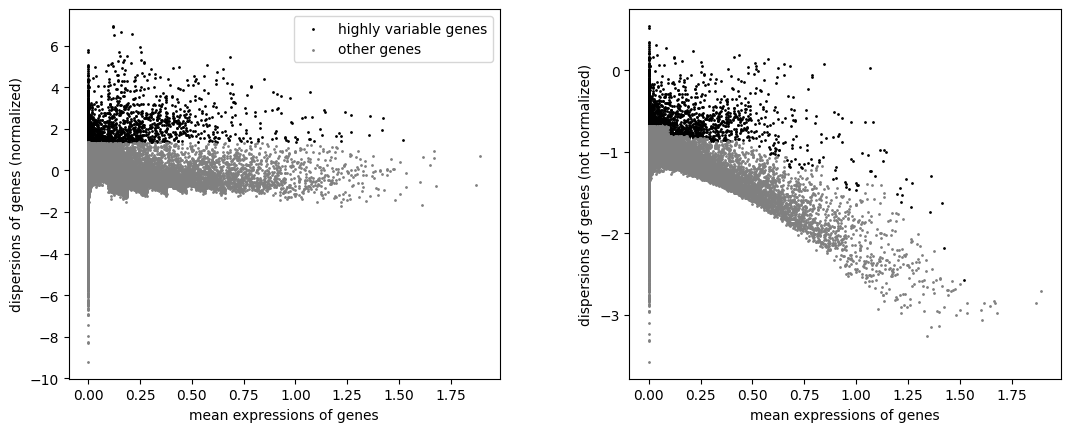

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
sc.tl.pca(adata)

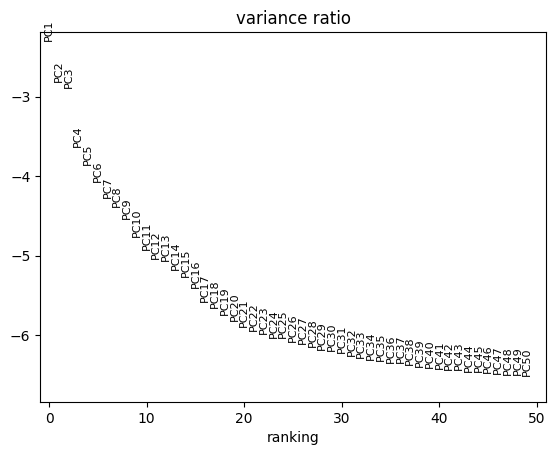

In [22]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

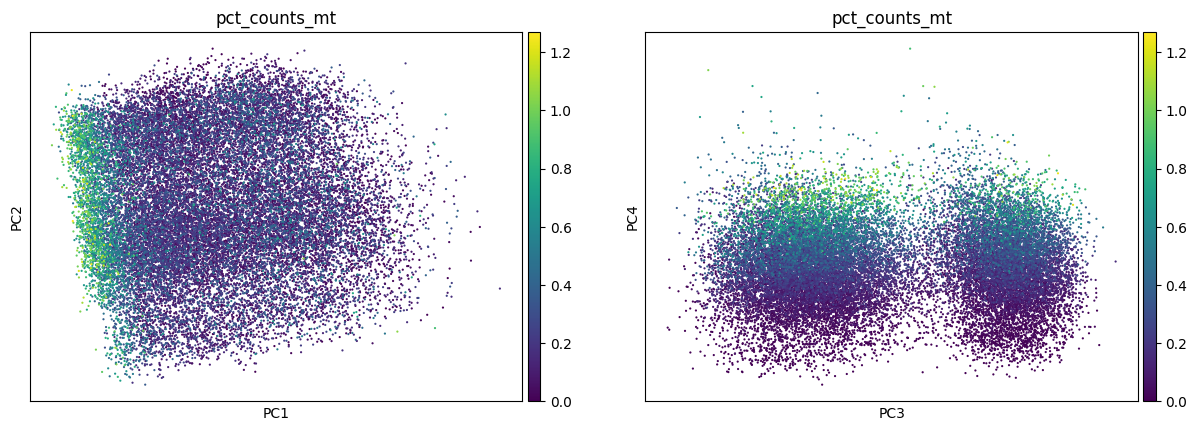

In [23]:
sc.pl.pca(
    adata,
    color=["pct_counts_mt"],
    dimensions=[(0, 1), (2, 3)],
    ncols=2,
    size=10,
)

In [24]:
sc.pp.neighbors(adata)

In [25]:
sc.tl.umap(adata)

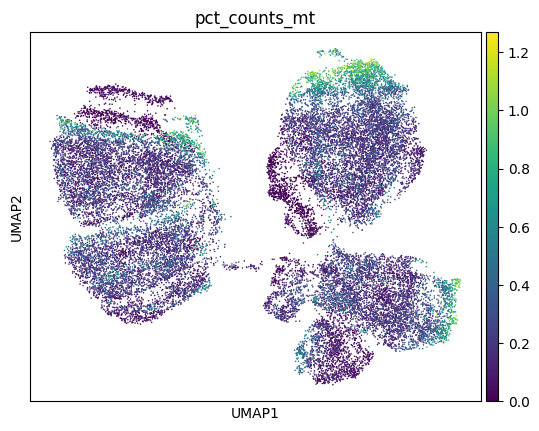

In [26]:
sc.pl.umap(
    adata,
    color="pct_counts_mt",
    # setting a smaller point size to get prevent overlap
    size=5,
)

In [28]:
sc.tl.leiden(adata, flavor="leidenalg", n_iterations=2)

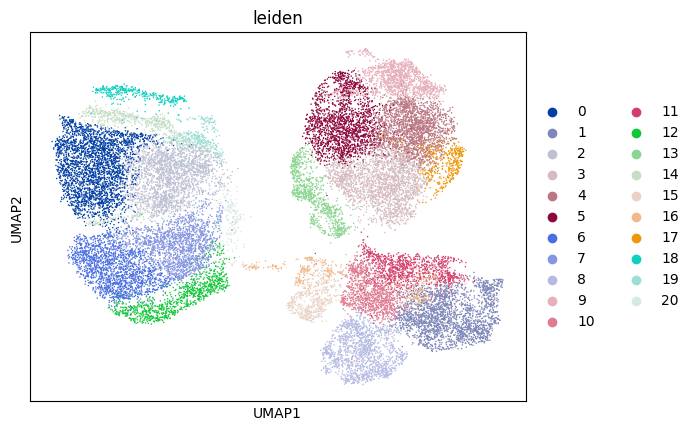

In [29]:
sc.pl.umap(adata, color=["leiden"])

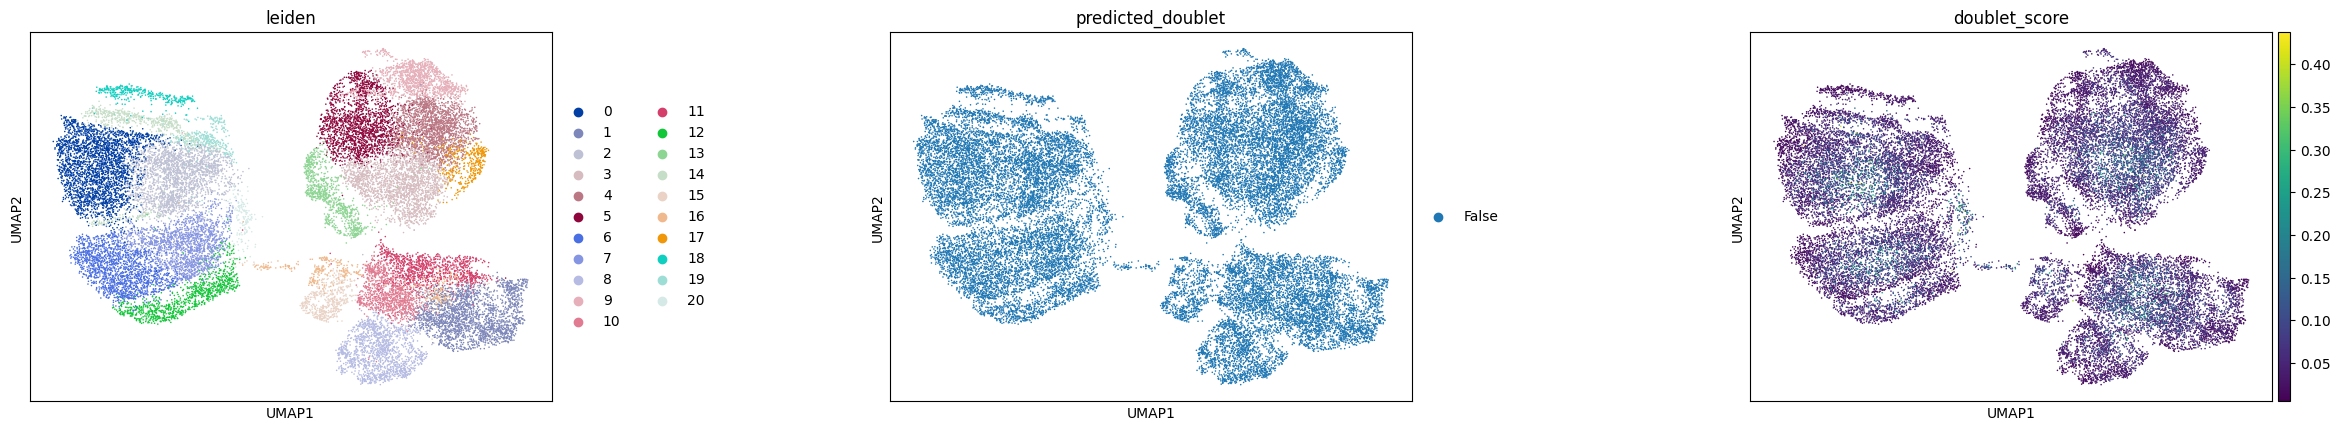

In [32]:
sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    wspace=0.5,
    size=5,
    )

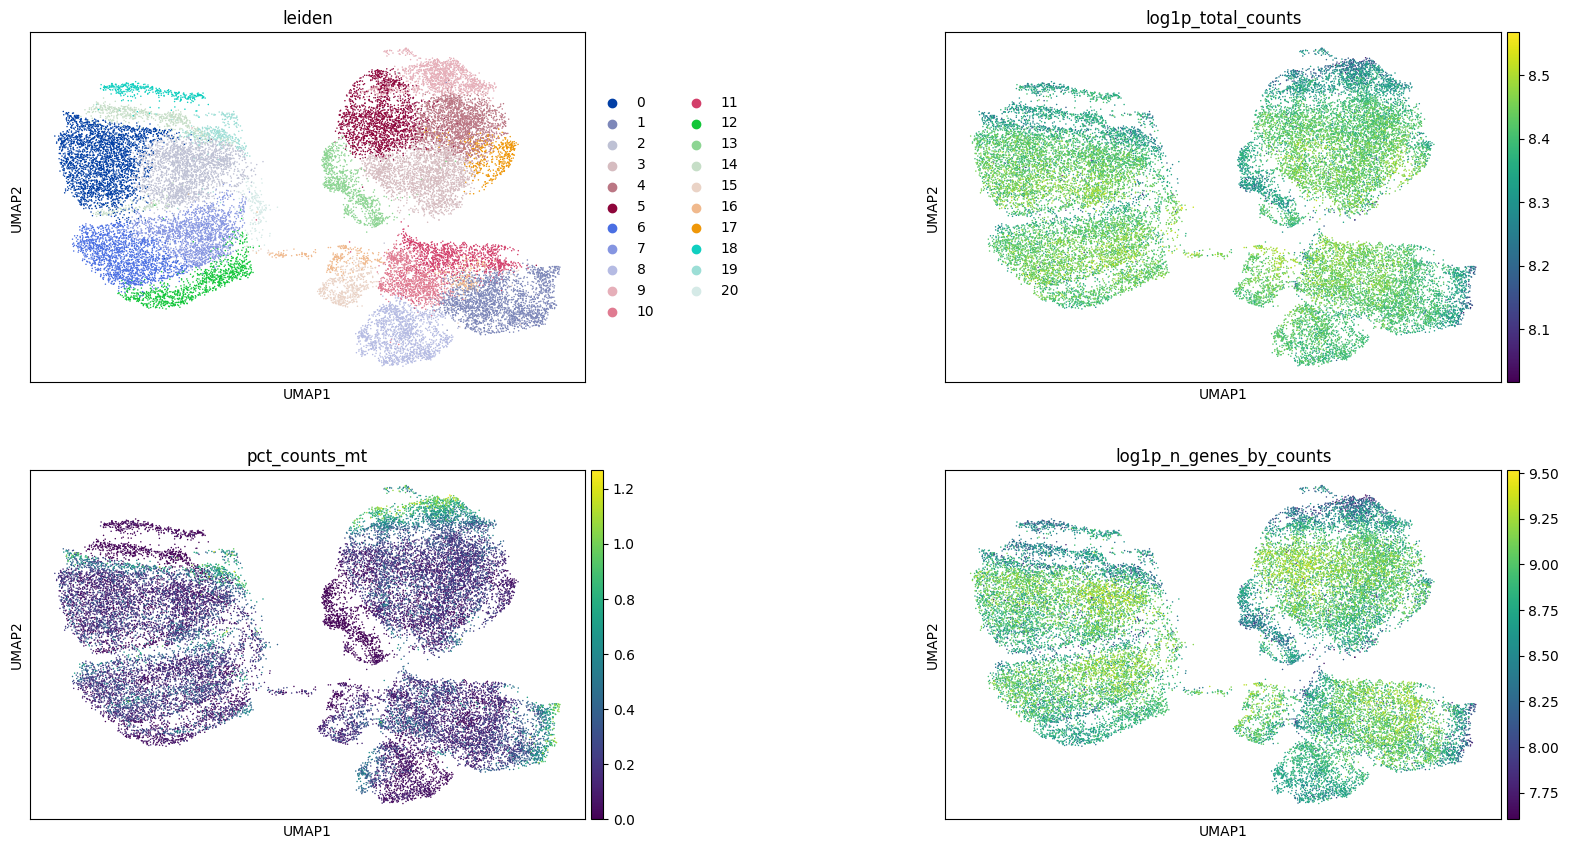

In [34]:
sc.pl.umap(
    adata,
    color=["leiden", "log1p_total_counts", "pct_counts_mt",
           "log1p_n_genes_by_counts"],
    wspace=0.5,
    ncols=2,
)

In [35]:
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}",
        resolution=res, flavor="leidenalg"
    )

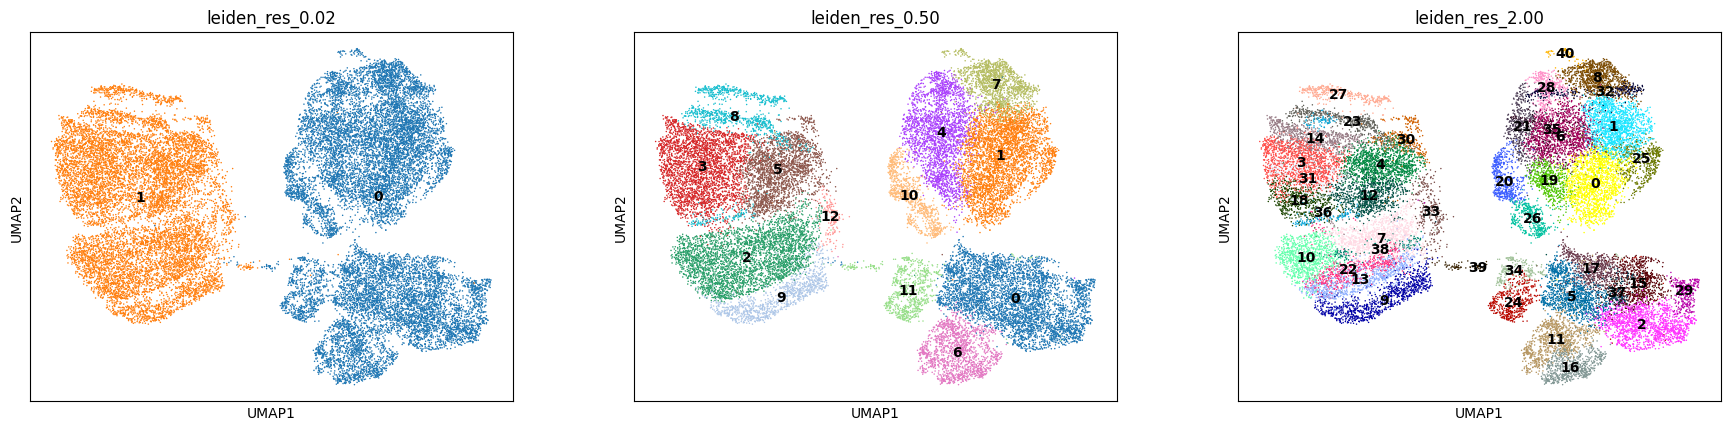

In [36]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02",
           "leiden_res_0.50",
           "leiden_res_2.00"],
    legend_loc="on data",
)

In [41]:
print(np.min(adata.X), np.max(adata.X))

0.0 2.02563


In [42]:
markers_df = markers_df[
    (markers_df['logfoldchanges'] > 1) &
    (markers_df['pvals_adj'] < 0.05)
]

In [43]:
top_markers = {}
for cluster in adata.obs['cell_type'].unique():
    df = sc.get.rank_genes_groups_df(adata, group=cluster)
    top_markers[cluster] = df.head(10)  # top 10 markers

summary_df = pd.concat(top_markers, names=['cell_type', 'rank'])
summary_df.to_csv('top_markers_per_cell_type.csv')

It seems you use rank_genes_groups on the raw count data. Please logarithmize your data before calling rank_genes_groups.


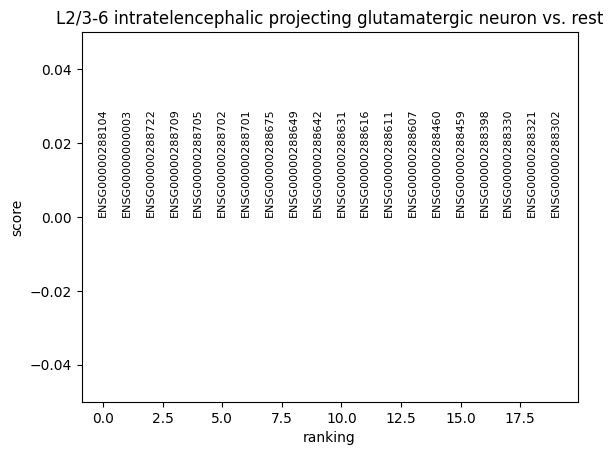

In [45]:

# Find markers for each cluster/cell type
sc.tl.rank_genes_groups(adata, groupby='cell_type', method='wilcoxon')

# View top markers per cluster
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

# Or get markers in a DataFrame for further filtering/export
markers_df = sc.get.rank_genes_groups_df(adata, group=None)  # None gives all groups

It seems you use rank_genes_groups on the raw count data. Please logarithmize your data before calling rank_genes_groups.
C:\Users\workexperience3\miniconda3\envs\scanpy\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
C:\Users\workexperience3\miniconda3\envs\scanpy\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[g

Unique marker genes across all Leiden clusters: 71


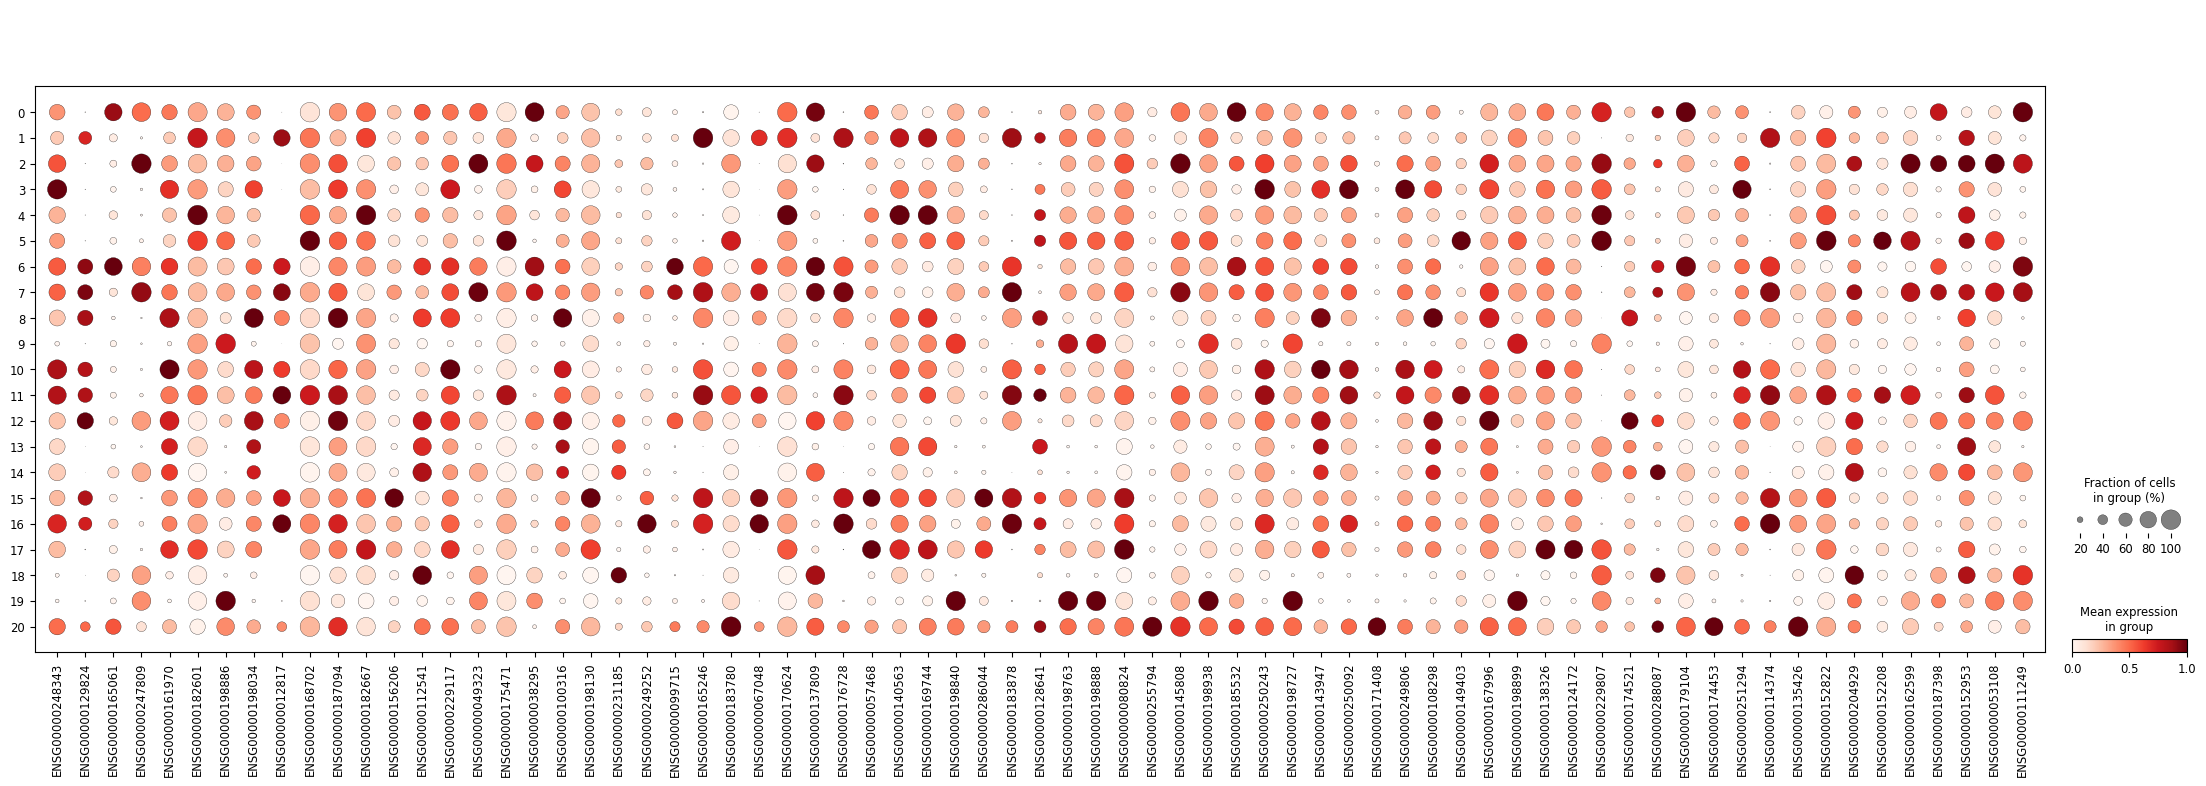

In [47]:
# Normalize and log-transform (if not done already)
sc.pp.normalize_total(adata, target_sum=1e4)
# Run marker gene detection for Leiden clusters
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

# Extract top 5 markers per Leiden cluster
marker_genes = []
clusters = adata.obs['leiden'].cat.categories  # if categorical, else .unique()

for cluster in clusters:
    df = sc.get.rank_genes_groups_df(adata, group=cluster)
    top5 = df.head(5)  # top 5 markers per cluster
    marker_genes.extend(top5['names'].tolist())

marker_genes = list(set(marker_genes))
print(f"Unique marker genes across all Leiden clusters: {len(marker_genes)}")

# Dotplot of markers across Leiden clusters
sc.pl.dotplot(adata, marker_genes, groupby='leiden', standard_scale='var')